<a href="https://www.kaggle.com/code/aligreualihassan/data-science-salary-regression-prediction?scriptVersionId=127589041" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df = data.copy()

In [4]:
data['company_size'] = data.company_size.astype("category")
data['experience_level'] = data.experience_level.astype("category")
data['employment_type'] = data.employment_type.astype("category")
data['job_title'] = data.job_title.astype("category")
data['company_location'] = data.company_location.astype("category")
data['employee_residence'] = data.employee_residence.astype("category")
data['work_year'] = data.work_year.astype("category")

In [5]:
data.shape

(3755, 11)

In [6]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
data.duplicated().sum()

1171

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.reset_index(drop=True, inplace=True)

In [10]:
data.dtypes

work_year             category
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency         object
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2584 non-null   category
 1   experience_level    2584 non-null   category
 2   employment_type     2584 non-null   category
 3   job_title           2584 non-null   category
 4   salary              2584 non-null   int64   
 5   salary_currency     2584 non-null   object  
 6   salary_in_usd       2584 non-null   int64   
 7   employee_residence  2584 non-null   category
 8   remote_ratio        2584 non-null   int64   
 9   company_location    2584 non-null   category
 10  company_size        2584 non-null   category
dtypes: category(7), int64(3), object(1)
memory usage: 107.3+ KB


In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [13]:
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [14]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [15]:
data.salary_in_usd.describe()

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

## Linear Regression Assumptions

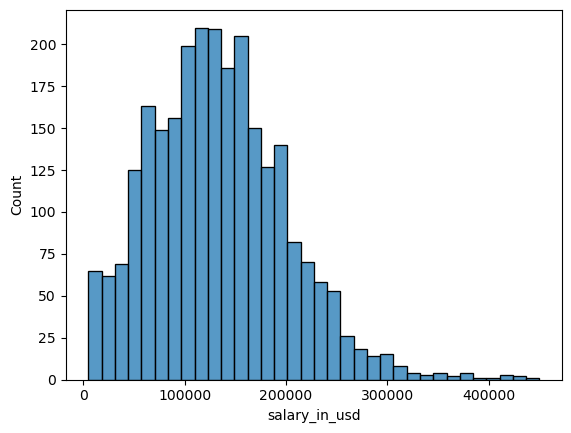

In [16]:
### Target Normality

sns.histplot(data=data, x='salary_in_usd')
plt.show()

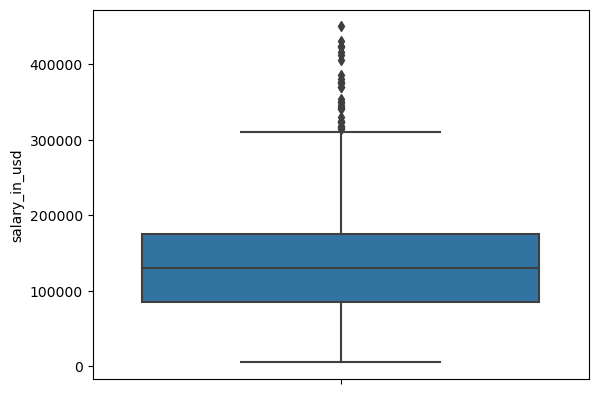

In [17]:
sns.boxplot(data=data, y='salary_in_usd')
plt.show()

In [18]:
data.work_year.value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

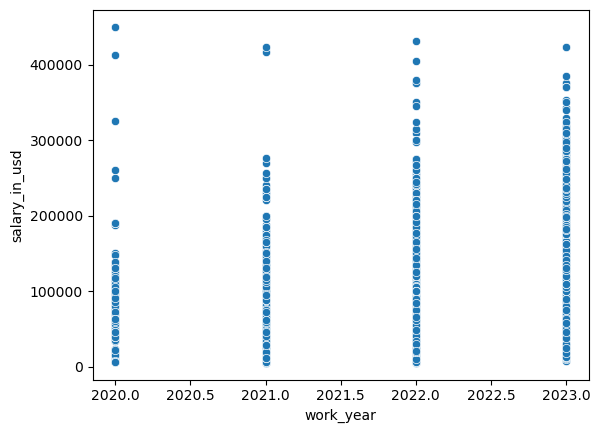

In [19]:
## linearity betwwen target and features

sns.scatterplot(x=data.work_year, y=data.salary_in_usd)
plt.show()

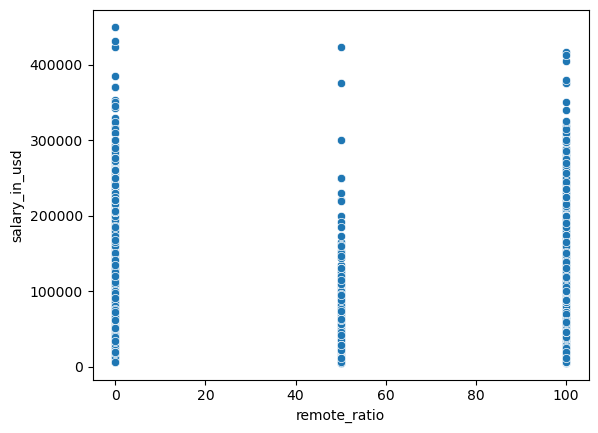

In [20]:
sns.scatterplot(x=data.remote_ratio, y=data.salary_in_usd)
plt.show()

## preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns.to_list():
    if data[col].dtype == 'category':
        data[col] = le.fit_transform(data[col])
        
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,3,2,84,85847,26,100,25,0
1,3,2,0,66,30000,75,100,70,2
2,3,2,0,66,25500,75,100,70,2
3,3,3,2,47,175000,11,100,12,1
4,3,3,2,47,120000,11,100,12,1


#### data splitting

In [22]:
from sklearn.model_selection import train_test_split

features = data.drop("salary_in_usd", axis=1)
target = data['salary_in_usd'].values

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

#### scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model building

In [24]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
from sklearn.metrics import r2_score

def mean_abs_error(y, preds):
    return np.mean(np.abs(y - preds))

def root_mean_squared_error(y, preds):
    return np.sqrt(np.mean(np.square(y - preds)))

reg_knn_preds = reg_knn.predict(X_test)
mae = mean_abs_error(y_test, reg_knn_preds)
rmse = root_mean_squared_error(y_test, reg_knn_preds)
r2score = r2_score(y_test, reg_knn_preds)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 41829.52340425532
the root mean squared error of the model is 55762.26167280228
the r2 score of the model is 0.2891223757650151


## hyper parameters

In [26]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(2, 20)),
         'weights':['uniform', 'distance']}

grid_reg_knn_model = GridSearchCV(reg_knn, params, cv=3)
grid_reg_knn_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [27]:
grid_reg_knn_model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [28]:
grid_reg_knn_model.best_estimator_.score(X_test, y_test)

0.2938569006249889

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = grid_reg_knn_model.best_estimator_.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
r2score = r2_score(y_test, predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 42277.81587677513
the root mean squared error of the model is 55576.25999297764
the r2 score of the model is 0.2938569006249889


In [30]:
comp = np.column_stack((y_test, predictions))
comp

array([[ 52533.        ,  84547.93295469],
       [ 90000.        , 162419.66666667],
       [225000.        , 162971.4       ],
       ...,
       [ 19073.        ,  46039.53925458],
       [ 96100.        , 170946.66666667],
       [175000.        , 128121.06666667]])

<AxesSubplot:>

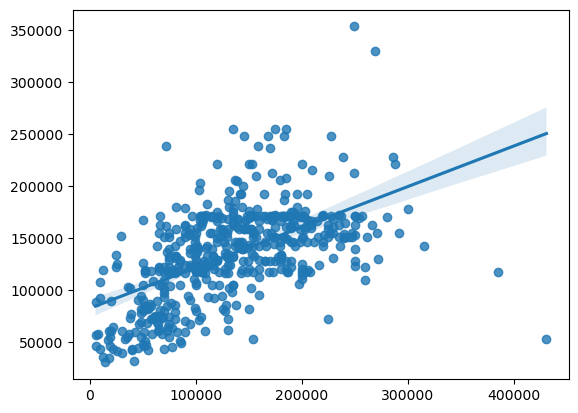

In [31]:
sns.regplot(x=comp[:,0], y=comp[:,1])

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr_predictions = lr.predict(X_test)

mae = mean_absolute_error(y_test, lr_predictions)
rmse = root_mean_squared_error(y_test, lr_predictions)
r2score = r2_score(y_test, lr_predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 44528.76673567924
the root mean squared error of the model is 56763.40473938718
the r2 score of the model is 0.2633673598871218


## Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=20)
dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)

mae = mean_absolute_error(y_test, dt_predictions)
rmse = root_mean_squared_error(y_test, dt_predictions)
r2score = r2_score(y_test, dt_predictions)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 42983.83279516727
the root mean squared error of the model is 59901.16234118433
the r2 score of the model is 0.17967757558725395


## Polynomial Features and pipeline

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    KNeighborsRegressor()
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [36]:
preds = pipe.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
r2score = r2_score(y_test, preds)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 41550.76402321083
the root mean squared error of the model is 53969.638635587864
the r2 score of the model is 0.33409372917897184


# Using The One Hot Encoding Technique

In [38]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [39]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [40]:
features = df.drop("salary_in_usd", axis=1)
target = df['salary_in_usd'].values
target_logg = np.log(target)

X_train, X_test, y_train, y_test = train_test_split(features, target_logg,
                                                    test_size=0.15,
                                                    random_state=42,
                                                    shuffle=True)

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD, PCA


pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore'),
    StandardScaler(),
#     PCA(n_components=3),
    TruncatedSVD(n_components=2),
    PolynomialFeatures(degree=3),
    KNeighborsRegressor(n_neighbors=10, weights='distance'))

pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=10, weights='distance'))])

In [66]:
preds = pipe.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
r2score = r2_score(y_test, preds)

print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))

the mean abs error of the model is 0.3358265264768422
the root mean squared error of the model is 0.46586669723785173
the r2 score of the model is 0.43607489117727627


In [67]:
comp = np.column_stack((np.exp(y_test), np.exp(preds)))
comp = pd.DataFrame(comp, columns =['actual', 'predicted'])

In [68]:
comp

,actual,predicted
0,168000.0,165448.246343
1,179975.0,138342.887463
2,144000.0,159449.268378
3,222200.0,202271.873506
4,230000.0,54370.062996
...,...,...
559,180000.0,129363.274997
560,120000.0,140430.372530
561,155000.0,129118.826617
562,64385.0,64290.198966


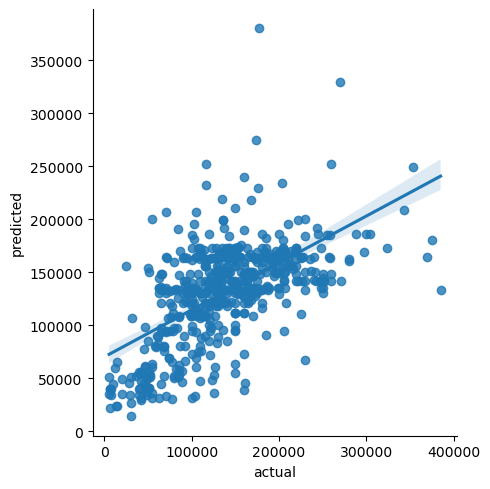

In [64]:
sns.lmplot(data=comp, x='actual', y='predicted')